In [10]:
import pickle
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss

%matplotlib inline

import rental_utils; reload(rental_utils)

<module 'rental_utils' from 'rental_utils.py'>

In [11]:
data, independent, test = rental_utils.load_data()
[X_train, X_val, y_train, y_val] = data

Loading raw data
Adding features
Adding regions
Adding variables
Dummyfying
Splitting data


In [5]:
model = pickle.load(open("Models/manual_rf.pkl", "rb"))
#model = pickle.load(open("Models/best_xgb.pkl", "rb"))

In [6]:
ct = pd.crosstab(preds_val, y_val.values, margins=False)
print(ct)

print('')
ct_perc = ct.apply(lambda x: x/sum(x), axis=1)
print(ct_perc)

print('')
accuracy_val = float(np.sum(preds_val==y_val))/len(preds_val)
print('Validation Accuracy: ' + str(round(100*accuracy_val, 1)))
print('Log loss:            ' + str(round(log_loss(y_val, probs_val), 3)))

print('')
high_accuracy = ct_perc.iloc[0,0]
print('High Accuracy: ' + str(round(100*high_accuracy, 1)))
med_accuracy = ct_perc.iloc[2,2]
print('Medium Accuracy: ' + str(round(100*med_accuracy, 1)))
low_accuracy = ct_perc.iloc[1,1]
print('Low Accuracy: ' + str(round(100*low_accuracy, 1)))

col_0   high    low  medium
row_0                      
high     304     80     190
low      391  10583    2303
medium   555    729    1152

col_0       high       low    medium
row_0                               
high    0.529617  0.139373  0.331010
low     0.029449  0.797093  0.173458
medium  0.227833  0.299261  0.472906

Validation Accuracy: 73.9
Log loss:            0.59

High Accuracy: 53.0
Medium Accuracy: 47.3
Low Accuracy: 79.7


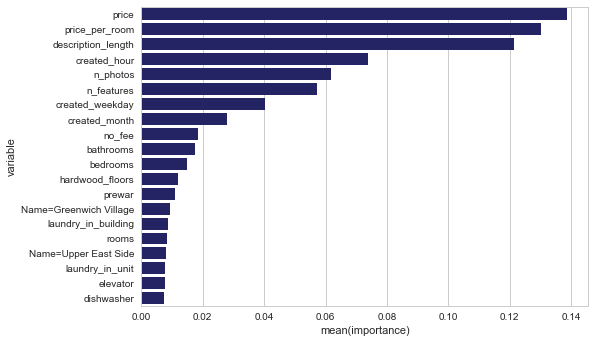

In [7]:
importance = pd.DataFrame({'variable':independent, 'importance':model.feature_importances_})
importance.sort_values(by='importance', ascending=False, inplace=True)
top_importance = importance.head(20)

sns.barplot(y='variable', x='importance', color="midnightblue", data=top_importance)

In [12]:
rental_utils.prepare_submission(model, test, independent)

Written to file Submissions/submission_2017-03-23_1217.csv
   listing_id      high    medium       low
0     7142618  0.039920  0.405436  0.554644
1     7210040  0.621653  0.285744  0.092603
2     7174566  0.003232  0.028805  0.967962
3     7191391  0.631033  0.293220  0.075748
4     7171695  0.008134  0.139290  0.852576
